<a href="https://colab.research.google.com/github/SaraKarim23/Train-and-Evaluate-a-Clustering-Model-in-Machine-Learning/blob/main/Train_and_Evaluate_a_Clustering_Model_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

--2021-07-23 10:44:57--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: ‘seeds.csv’

seeds.csv           100%[===================>]   9.17K  --.-KB/s    in 0s      

2021-07-23 10:44:57 (91.6 MB/s) - ‘seeds.csv’ saved [9386/9386]



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
93,18.59,16.05,0.9066,6.037,3.860,6.001
86,18.88,16.26,0.8969,6.084,3.764,1.649
153,11.18,13.04,0.8266,5.220,2.693,3.332
87,18.98,16.66,0.8590,6.549,3.670,3.691
111,19.38,16.72,0.8716,6.303,3.791,3.678
55,15.03,14.77,0.8658,5.702,3.212,1.933
23,12.08,13.23,0.8664,5.099,2.936,1.415
204,12.37,13.47,0.8567,5.204,2.960,3.919
128,20.16,17.03,0.8735,6.513,3.773,1.910
70,17.63,15.98,0.8673,6.191,3.561,4.076


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

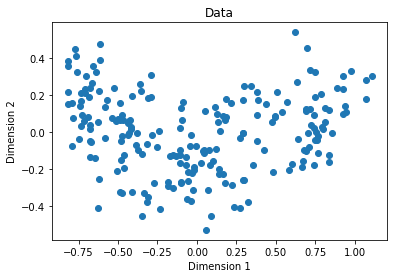

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

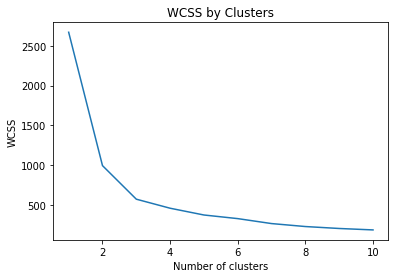

In [5]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()